In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
sample_submission = pd.read_csv("smoking_habit_prediction/sample_submission.csv")
print(sample_submission.shape)
sample_submission.head()

(106171, 2)


,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5


In [3]:
sample_submission.smoking.describe()

count    106171.0
mean          0.5
std           0.0
min           0.5
25%           0.5
50%           0.5
75%           0.5
max           0.5
Name: smoking, dtype: float64

In [4]:
test_df = pd.read_csv("smoking_habit_prediction/test.csv")
print(test_df.shape)
test_df.head().T

(106171, 23)


,0,1,2,3,4
id,159256.0,159257.0,159258.0,159259.0,159260.0
age,40.0,80.0,60.0,40.0,40.0
height(cm),165.0,160.0,170.0,160.0,170.0
weight(kg),70.0,60.0,70.0,50.0,75.0
waist(cm),84.0,93.0,86.5,67.0,89.4
eyesight(left),1.2,1.0,0.6,0.3,1.0
eyesight(right),1.2,1.0,0.7,0.4,0.9
hearing(left),1.0,2.0,1.0,1.0,1.0
hearing(right),1.0,2.0,1.0,1.0,1.0
systolic,130.0,144.0,117.0,116.0,132.0


In [5]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [6]:
train_df = pd.read_csv("smoking_habit_prediction/train.csv")
print(train_df.shape)
train_df.head().T

(159256, 24)


,0,1,2,3,4
id,0.0,1.0,2.0,3.0,4.0
age,55.0,70.0,20.0,35.0,30.0
height(cm),165.0,165.0,170.0,180.0,165.0
weight(kg),60.0,65.0,75.0,95.0,60.0
waist(cm),81.0,89.0,81.0,105.0,80.5
eyesight(left),0.5,0.6,0.4,1.5,1.5
eyesight(right),0.6,0.7,0.5,1.2,1.0
hearing(left),1.0,2.0,1.0,1.0,1.0
hearing(right),1.0,2.0,1.0,1.0,1.0
systolic,135.0,146.0,118.0,131.0,121.0


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


In [8]:
df = train_df.copy()
df.shape

(159256, 24)

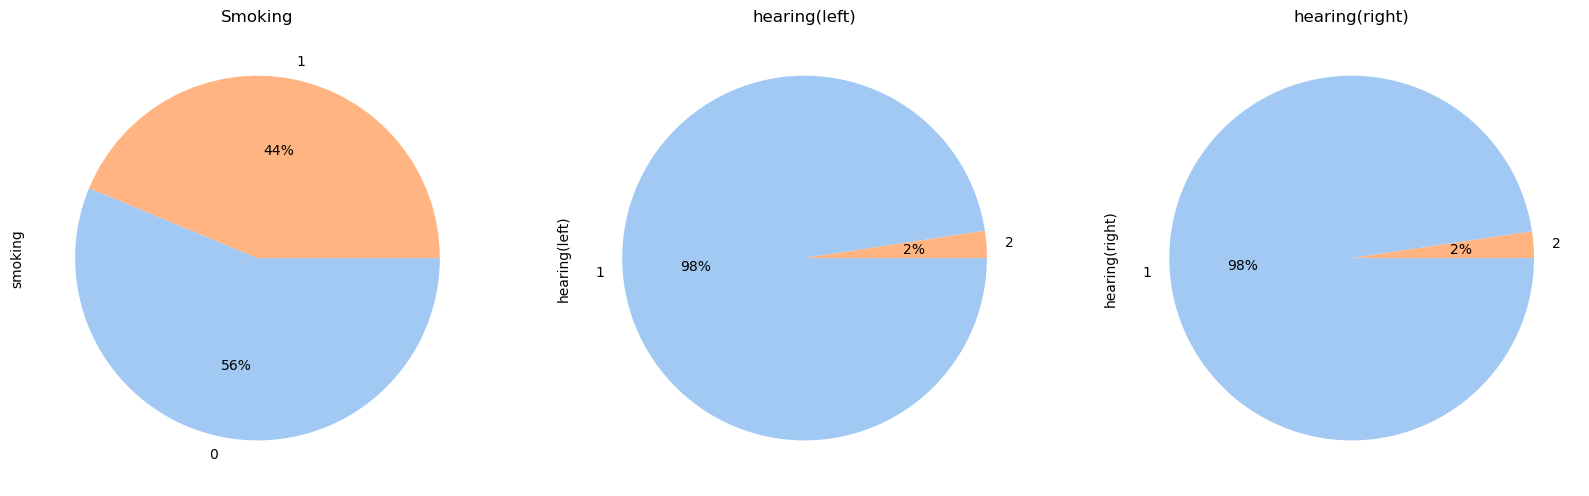

In [10]:
plt.figure(figsize=(20,20))
colors = sns.color_palette('pastel')
plt.subplot(1, 3, 1)    
df['smoking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Smoking')

plt.subplot(1, 3, 2)    
df['hearing(left)'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('hearing(left)')

plt.subplot(1, 3, 3)    
df['hearing(right)'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('hearing(right)')

plt.show() 

In [11]:
df.age.value_counts()

40    46691
60    19043
45    18480
50    15768
55    13446
35    13081
30    11465
25     9140
20     3829
65     3637
70     2229
75     1760
80      644
85       38
58        2
62        1
69        1
49        1
Name: age, dtype: int64

In [12]:
df.smoking.value_counts()


0    89603
1    69653
Name: smoking, dtype: int64

In [13]:
df['dental caries'].value_counts()


0    127724
1     31532
Name: dental caries, dtype: int64

In [15]:
def diagnostic_plots(df, variable, smoking):
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 4, 1)
    skew = df[variable].skew()
    sns.histplot(df[variable], kde = True, stat="density", label='Skew = %.3f' %(skew), bins=30, color = 'r')
    plt.legend(loc='best')
    plt.title('Histogram')

    plt.subplot(1, 4, 2)
    plt.scatter(x=df[variable], y=df['smoking'], color = 'g')
    plt.title('Scatterplot')

    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable], color = 'b', x= df['smoking'])
    plt.title('Boxplot')

    plt.subplot(1, 4, 4)
    sns.barplot(x = smoking, y = variable, data = df)   
    plt.title('Barplot')

    plt.show()

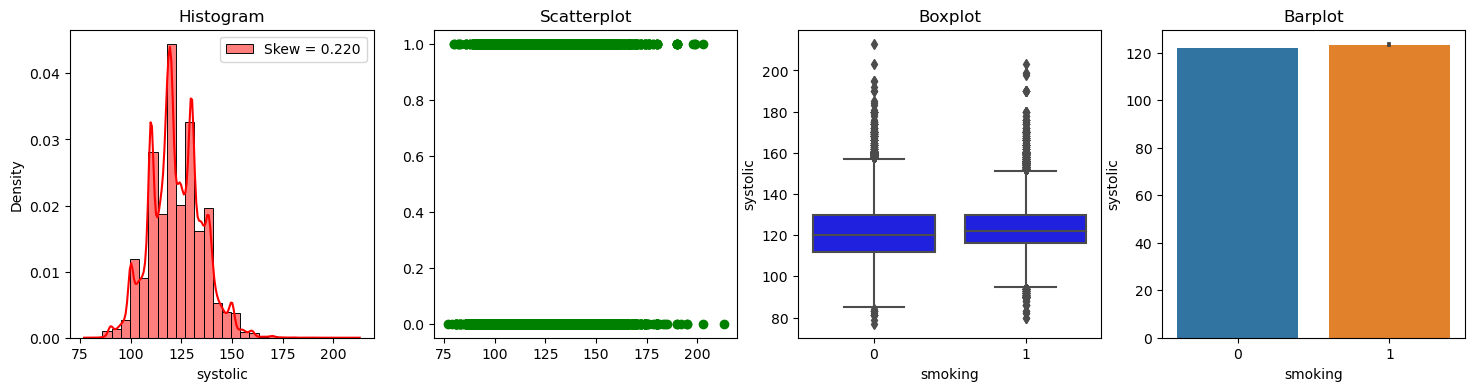

In [16]:
diagnostic_plots(df, 'systolic', 'smoking')


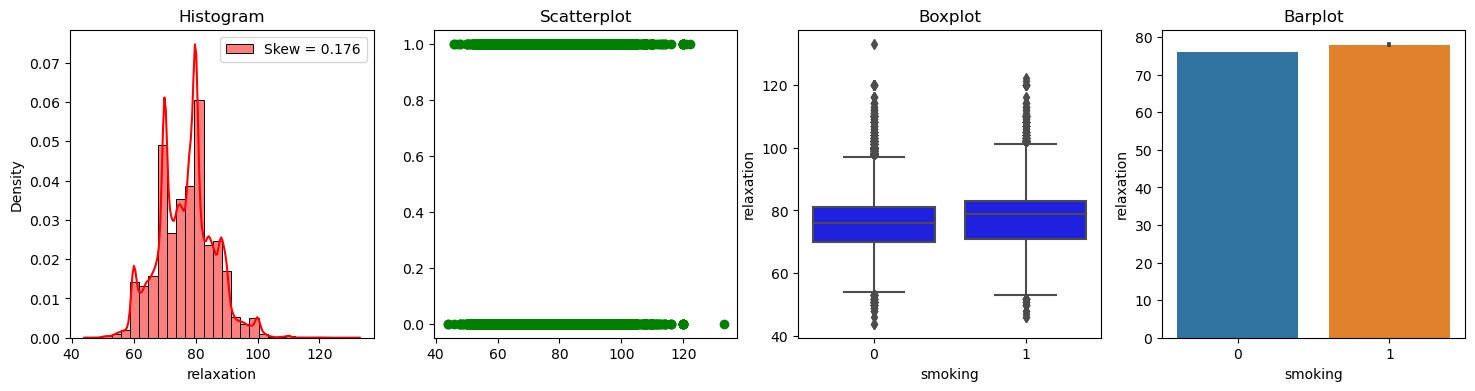

In [17]:
diagnostic_plots(df, 'relaxation', 'smoking')


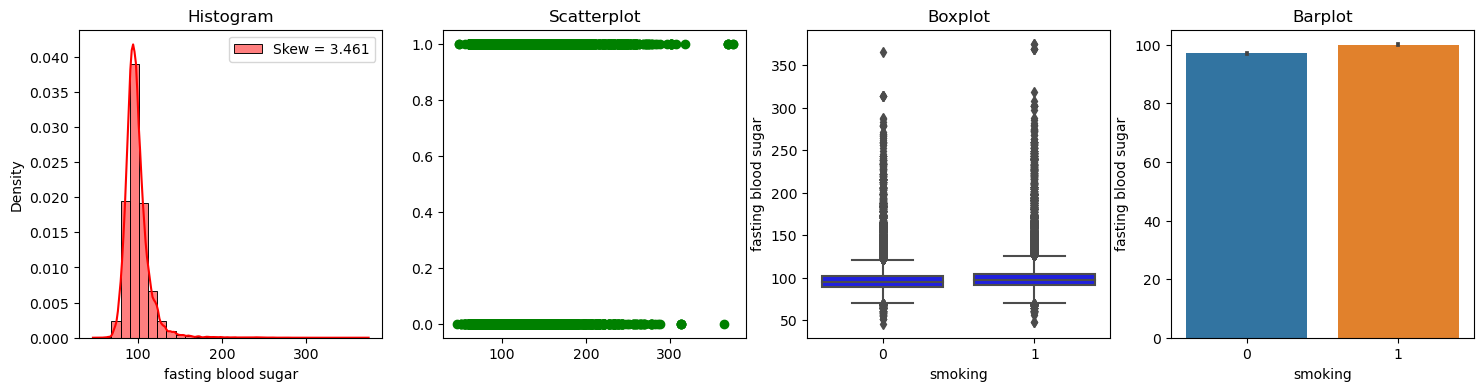

In [18]:
diagnostic_plots(df, 'fasting blood sugar', 'smoking')


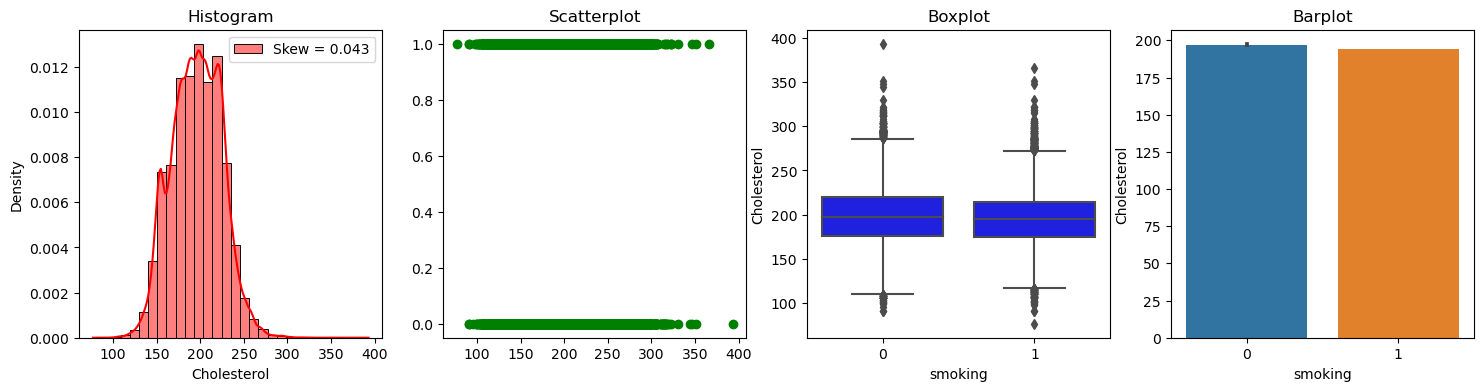

In [19]:
diagnostic_plots(df, 'Cholesterol', 'smoking')


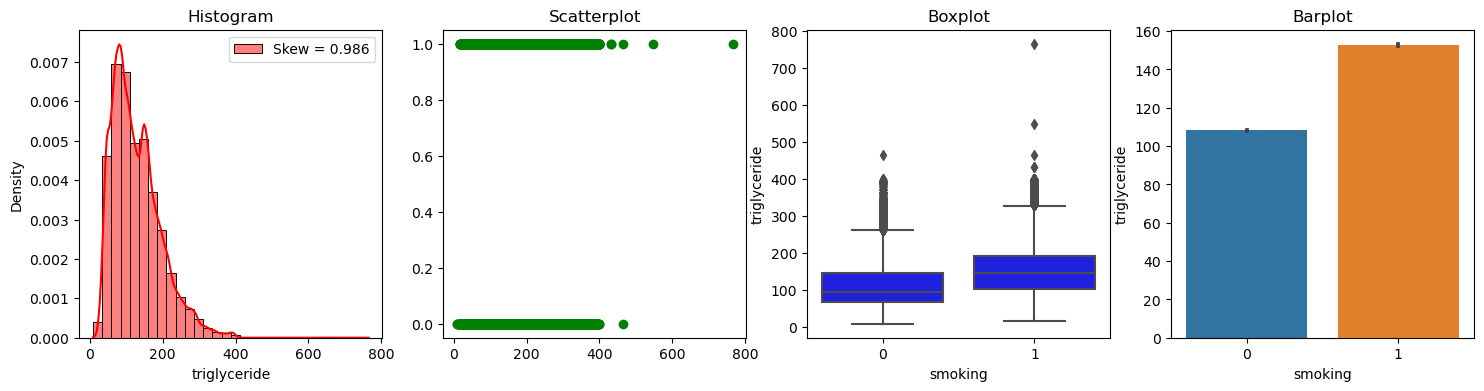

In [20]:
diagnostic_plots(df, 'triglyceride', 'smoking')


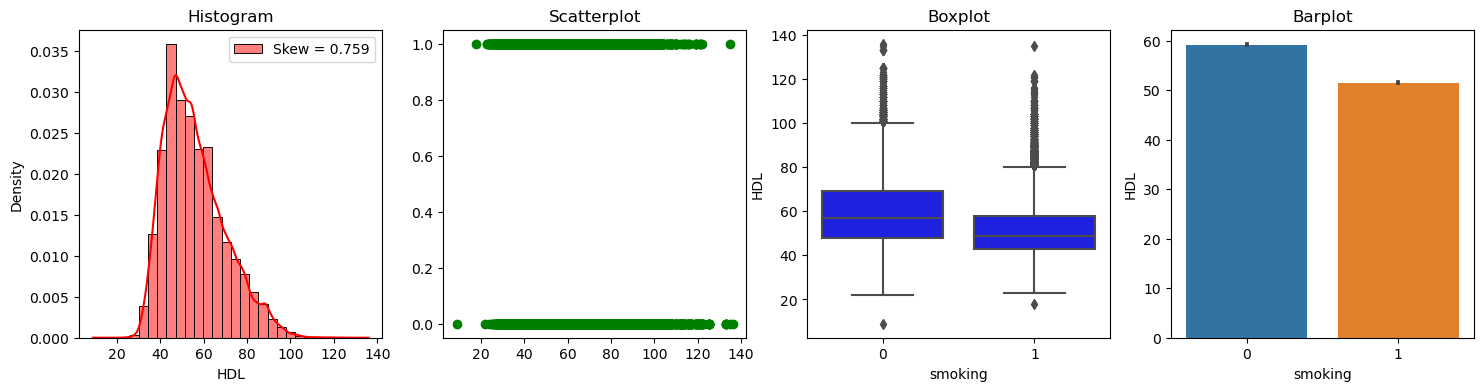

In [21]:
diagnostic_plots(df, 'HDL', 'smoking')


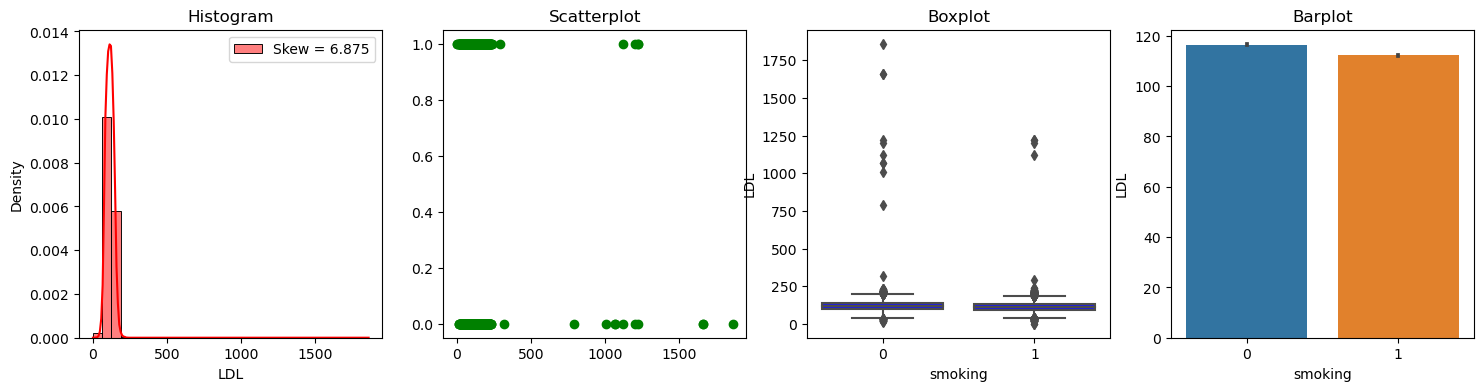

In [22]:
diagnostic_plots(df, 'LDL', 'smoking')


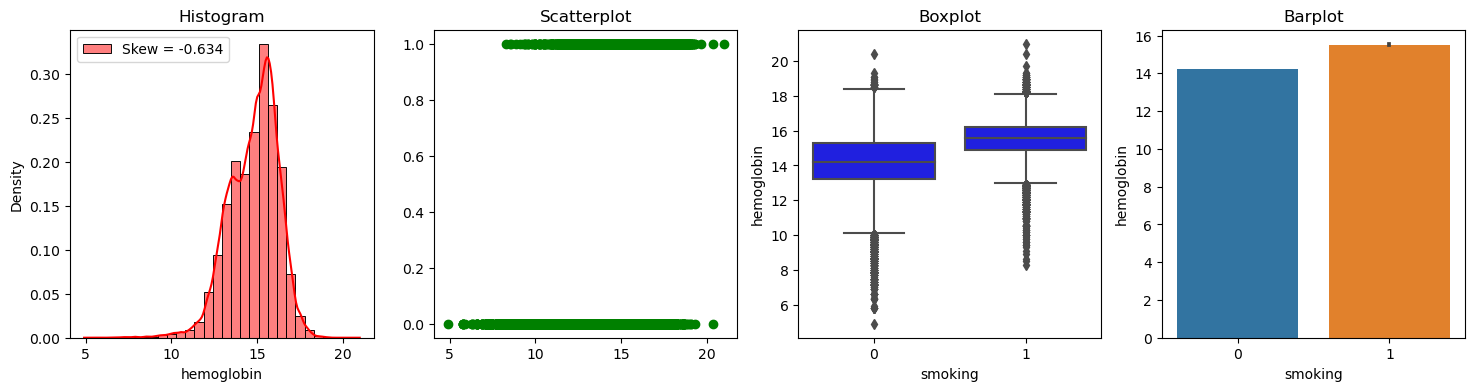

In [23]:
diagnostic_plots(df, 'hemoglobin', 'smoking')


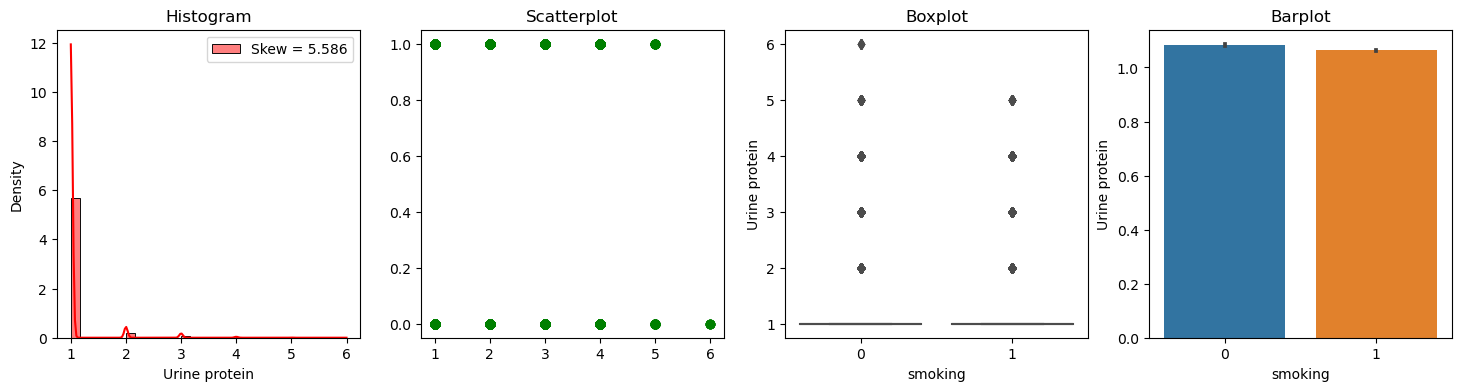

In [24]:
diagnostic_plots(df, 'Urine protein', 'smoking')


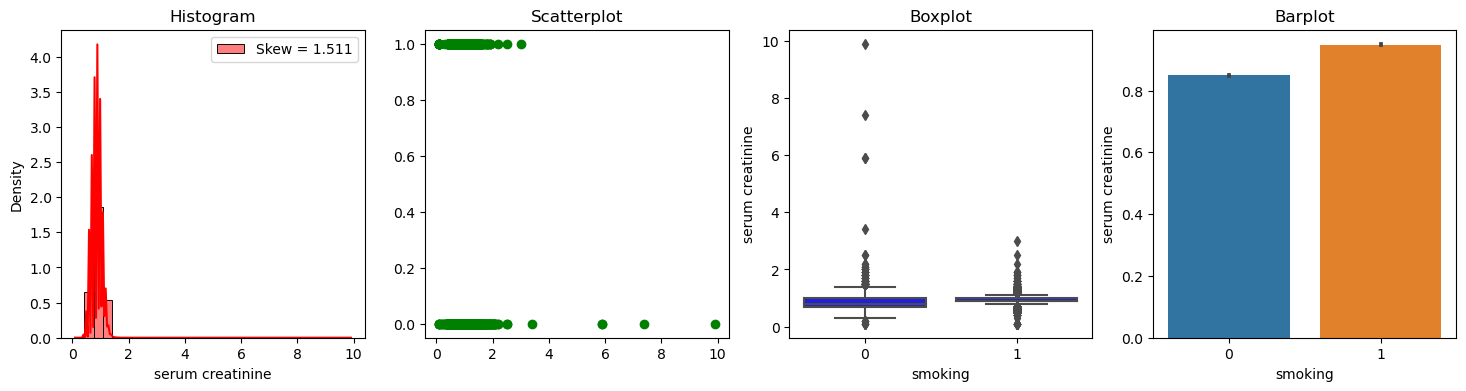

In [25]:
diagnostic_plots(df, 'serum creatinine', 'smoking')


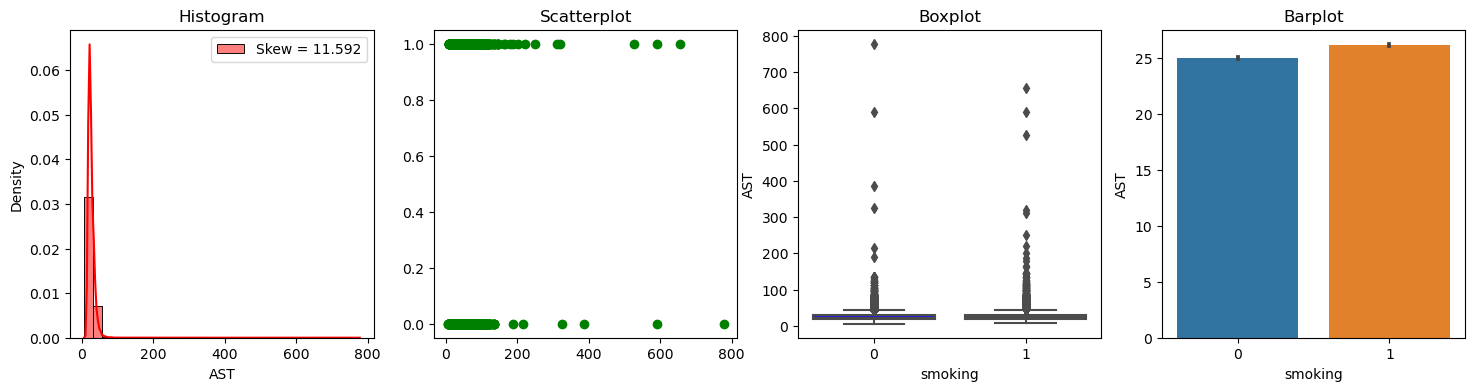

In [26]:
diagnostic_plots(df, 'AST', 'smoking')


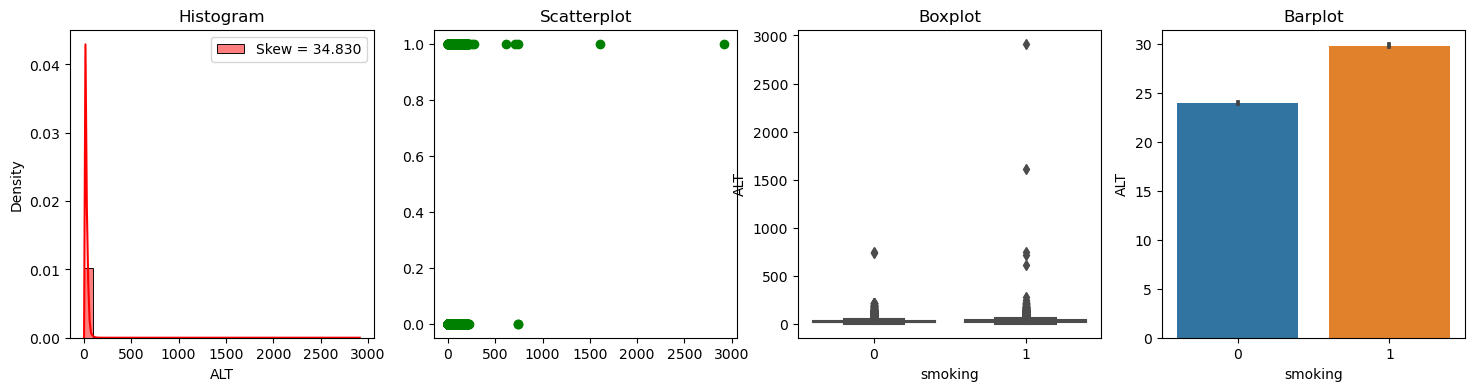

In [27]:
diagnostic_plots(df, 'ALT', 'smoking')


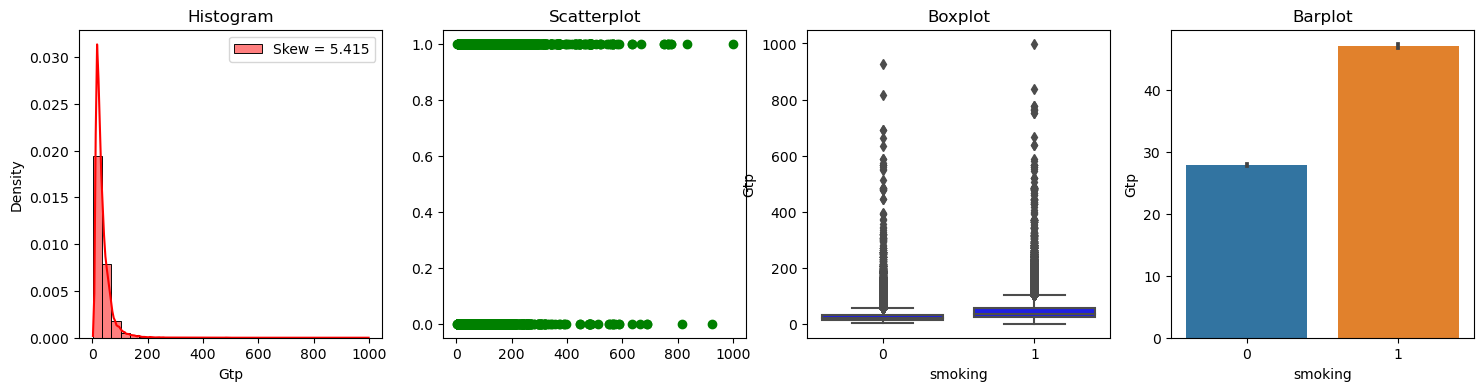

In [28]:
diagnostic_plots(df, 'Gtp', 'smoking')


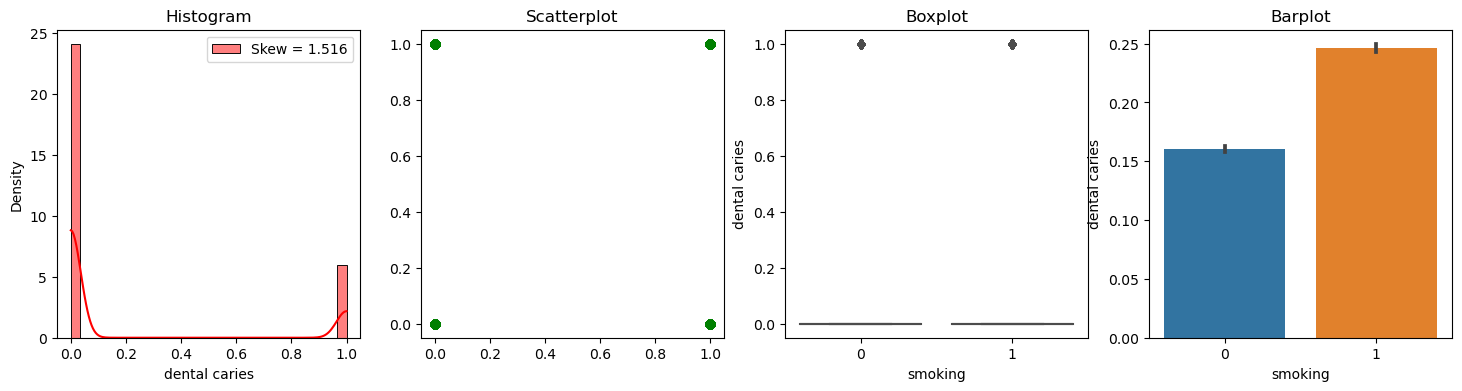

In [29]:
diagnostic_plots(df, 'dental caries', 'smoking')


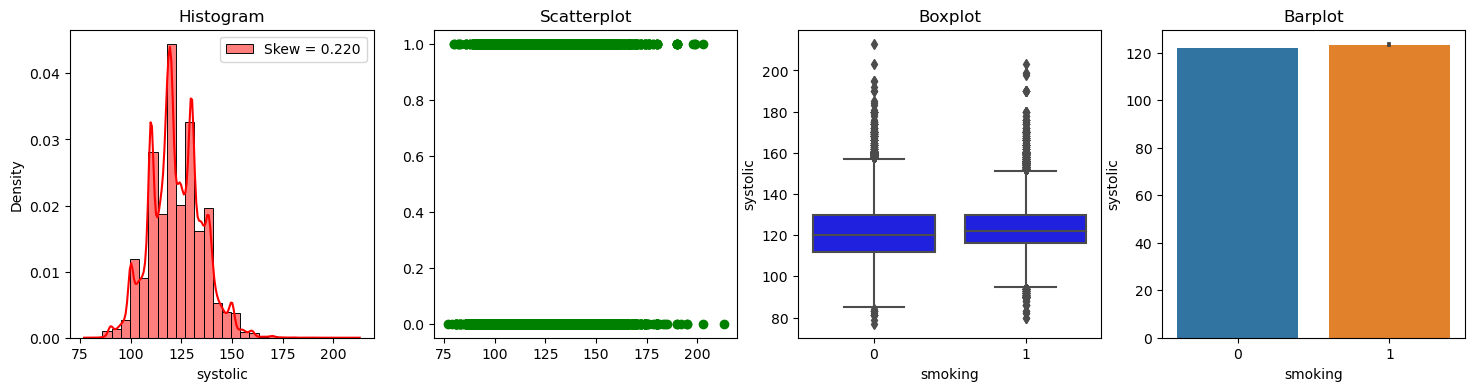

In [30]:
diagnostic_plots(df, 'systolic', 'smoking')


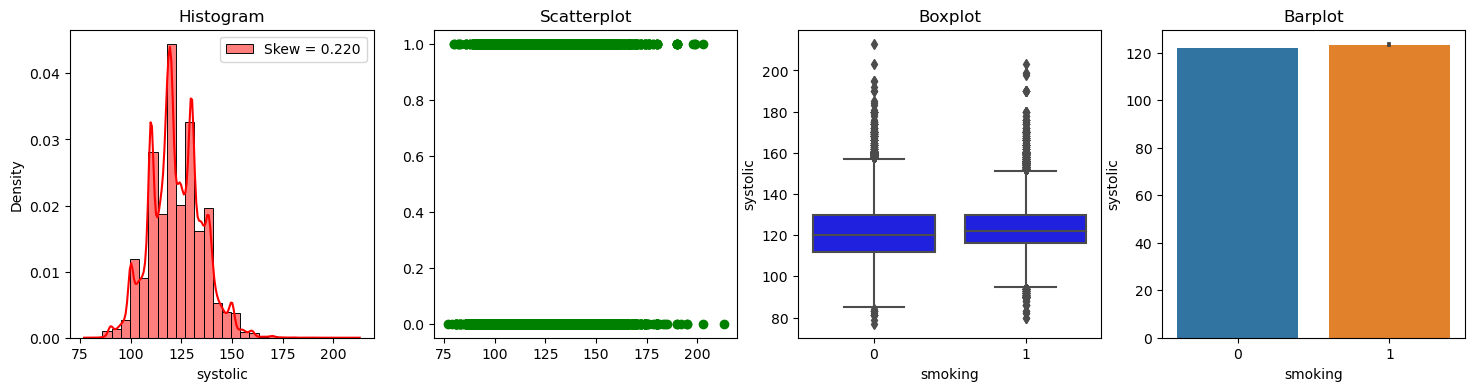

In [31]:
diagnostic_plots(df, 'systolic', 'smoking')


In [32]:
df_corr = df.drop(['id'], axis=1)
corrmat = df_corr.corr(method='spearman')
corrmat

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.509158,-0.355602,-0.063246,-0.377736,-0.374113,0.183242,0.182536,0.141217,0.065748,...,0.058921,0.123520,-0.324169,-0.025419,-0.181925,0.069773,-0.131163,-0.076149,-0.128989,-0.207710
height(cm),-0.509158,1.000000,0.704321,0.416325,0.279778,0.284489,-0.085039,-0.086596,0.074649,0.117780,...,-0.302785,-0.077574,0.585679,-0.011726,0.481935,0.069683,0.300153,0.349446,0.101856,0.447175
weight(kg),-0.355602,0.704321,1.000000,0.820230,0.209100,0.214500,-0.071817,-0.072175,0.245225,0.265093,...,-0.444158,0.071234,0.559550,-0.036013,0.433888,0.182196,0.477411,0.478425,0.090022,0.366190
waist(cm),-0.063246,0.416325,0.820230,1.000000,0.058591,0.064554,0.005437,0.007842,0.305476,0.287844,...,-0.441937,0.134162,0.419211,-0.041603,0.310922,0.223047,0.468163,0.473401,0.052168,0.262845
eyesight(left),-0.377736,0.279778,0.209100,0.058591,1.000000,0.711765,-0.103193,-0.107717,-0.049290,0.009122,...,-0.051469,-0.024226,0.190535,-0.000733,0.126081,-0.006423,0.102206,0.087733,0.033300,0.136195
eyesight(right),-0.374113,0.284489,0.214500,0.064554,0.711765,1.000000,-0.101567,-0.108388,-0.043760,0.016069,...,-0.056933,-0.022350,0.197706,0.000238,0.129395,-0.003106,0.108467,0.097009,0.038757,0.146535
hearing(left),0.183242,-0.085039,-0.071817,0.005437,-0.103193,-0.101567,1.000000,0.553312,0.042905,-0.012605,...,0.003034,-0.011243,-0.060209,-0.012975,-0.013075,0.007361,-0.051439,-0.026730,-0.019155,-0.038219
hearing(right),0.182536,-0.086596,-0.072175,0.007842,-0.107717,-0.108388,0.553312,1.000000,0.042541,-0.016845,...,0.003363,-0.011748,-0.058181,-0.009825,-0.012305,0.011804,-0.049487,-0.024729,-0.016100,-0.036858
systolic,0.141217,0.074649,0.245225,0.305476,-0.049290,-0.043760,0.042905,0.042541,1.000000,0.746542,...,-0.107568,0.063560,0.173879,-0.043929,0.067932,0.127416,0.168966,0.231102,0.020856,0.062703
relaxation,0.065748,0.117780,0.265093,0.287844,0.009122,0.016069,-0.012605,-0.016845,0.746542,1.000000,...,-0.120882,0.085913,0.228812,-0.033764,0.095291,0.122956,0.186940,0.264707,0.024251,0.113103


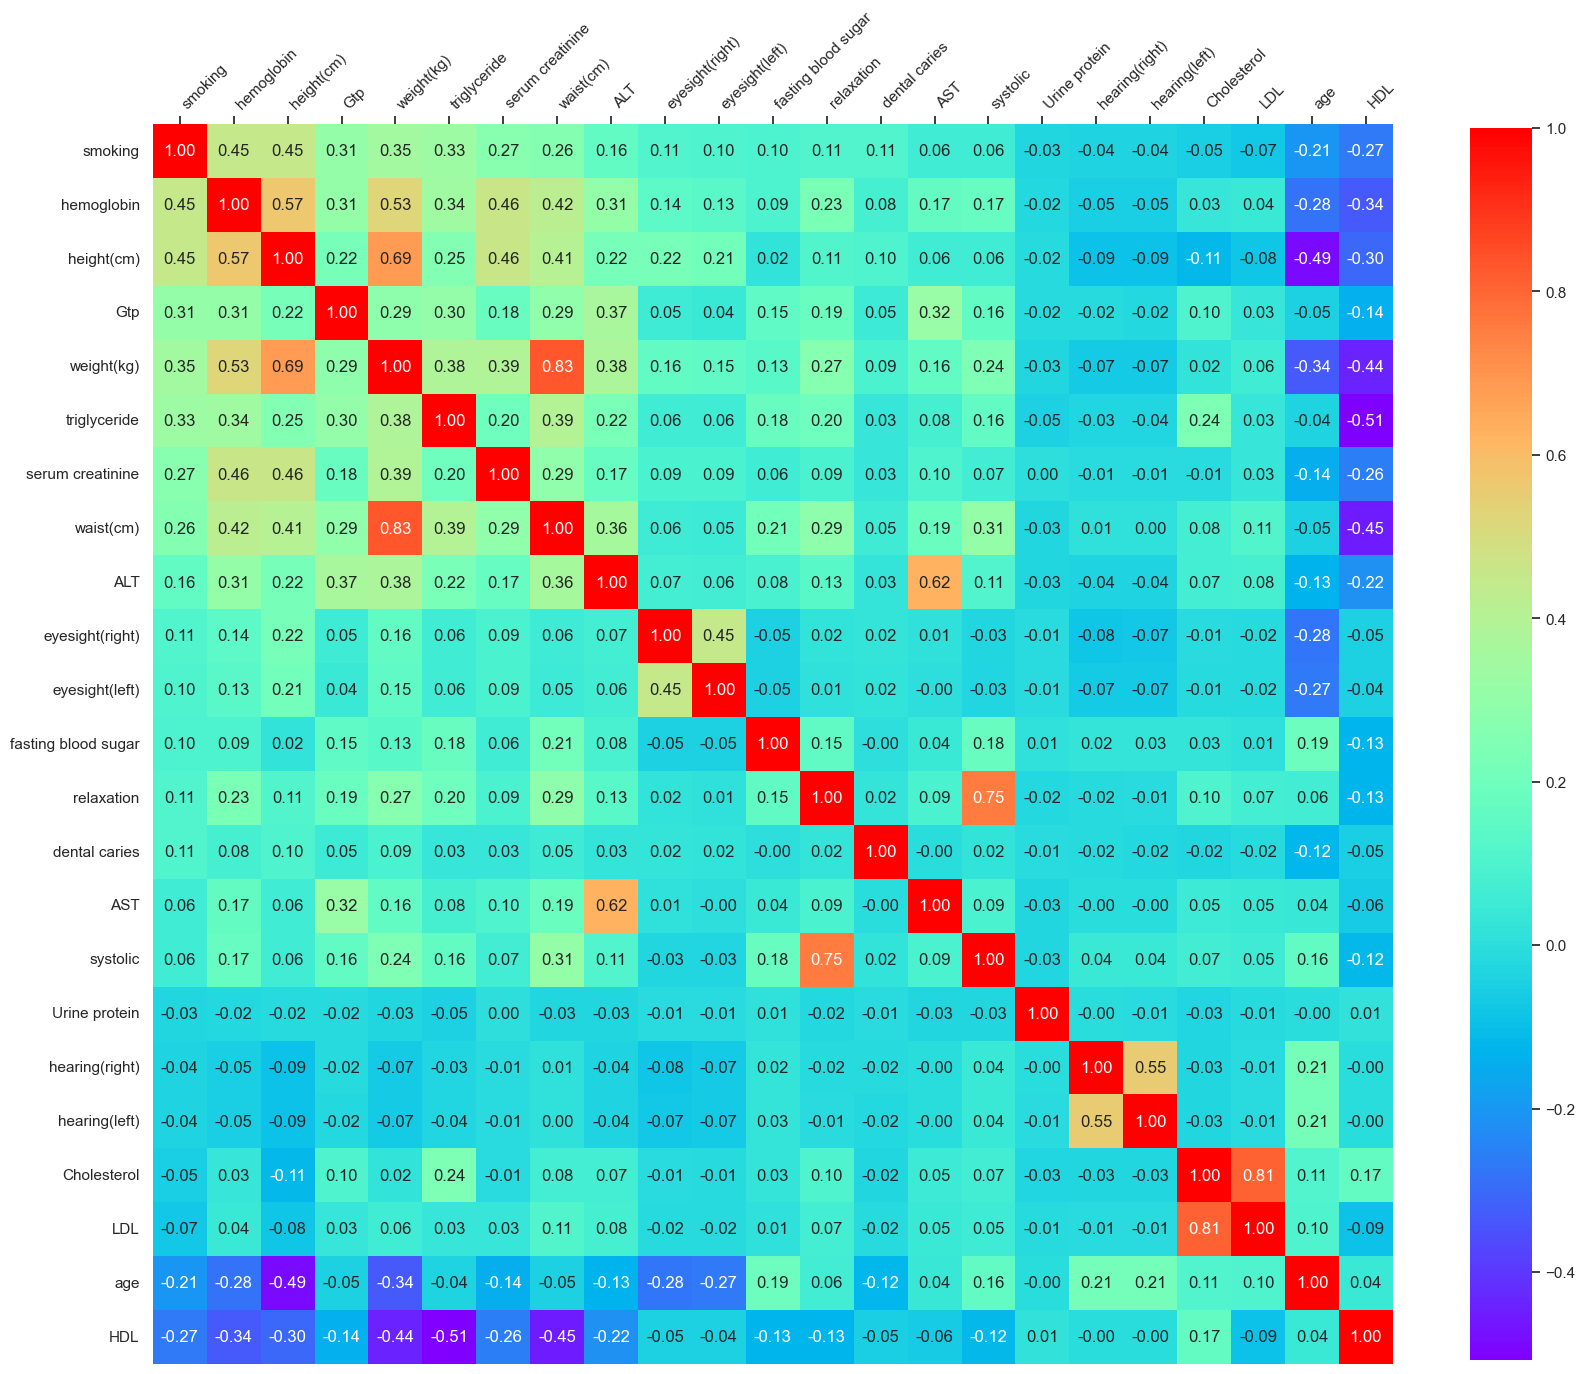

In [33]:
plt.figure(figsize=(20, 20))
k=23
cols = corrmat.nlargest(k, 'smoking')['smoking'].index
cm = np.corrcoef(df_corr[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="rainbow", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

In [34]:
target = df['smoking']
feature = df.drop(['id', 'smoking'], axis=1)

feature.shape, target.shape

((159256, 22), (159256,))

In [35]:
feature.columns


Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
scaler.fit_transform(feature)

feature_scaled = scaler.transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, 
                              columns=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 
                                       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 
                                       'hearing(right)', 'systolic', 'relaxation', 
                                       'fasting blood sugar', 'Cholesterol', 'triglyceride', 
                                       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 
                                       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries'])

feature_scaled.head() 

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.902985,-0.030268,-0.567581,-0.223489,-1.257856,-1.022156,-0.156725,-0.154865,0.981702,1.125777,...,2.604429,-1.135246,-1.406581,1.189928,-0.213401,0.597927,-0.371570,-0.087326,-0.295342,-0.496866
1,2.169636,-0.030268,-0.170319,0.669577,-1.009169,-0.767247,6.380587,6.457242,1.845852,0.681066,...,-1.097105,0.082162,0.404573,0.980315,-0.213401,1.155511,0.156700,-0.199983,0.025124,2.012614
2,-2.052535,0.536694,0.624205,-0.223489,-1.506543,-1.277064,-0.156725,-0.154865,-0.353802,-0.208355,...,1.048274,-0.777185,-0.767350,1.818767,-0.213401,-0.517239,0.156700,0.250645,0.537870,-0.496866
3,-0.785883,1.670617,2.213252,2.455708,1.229017,0.507296,-0.156725,-0.154865,0.667465,1.236955,...,1.138923,-1.278470,-0.447734,0.770702,-0.213401,0.597927,-0.582878,0.025331,-0.199202,2.012614
4,-1.208100,-0.030268,-0.567581,-0.279305,1.229017,-0.002521,-0.156725,-0.154865,-0.118125,-0.097177,...,-0.613639,-0.848797,-0.767350,0.421347,-0.213401,-0.517239,-0.688532,-0.763267,-0.615808,-0.496866


In [37]:
test_df.head()


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [38]:
test = test_df.drop(['id'], axis=1)
test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1


In [39]:
test.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [40]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, 
                           columns=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 
                                    'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 
                                    'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 
                                    'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 
                                    'AST', 'ALT', 'Gtp', 'dental caries'])

test_scaled.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,-0.363666,-0.030268,0.226943,0.111411,0.482955,0.507296,-0.156725,-0.154865,0.588906,1.348132,...,0.882082,-0.490736,0.013932,-0.417106,-0.213401,0.040344,-0.688532,-0.087326,-0.135109,-0.496866
1,3.014071,-0.597229,-0.567581,1.116110,-0.014419,-0.002521,6.380587,6.457242,1.688733,-0.541888,...,0.459050,-1.493307,-0.376709,-1.255558,-0.213401,1.155511,-0.582878,-0.819596,-0.391482,-0.496866
2,1.325202,0.536694,0.226943,0.390494,-1.009169,-0.767247,-0.156725,-0.154865,-0.432361,-0.208355,...,0.685674,-1.206858,-0.944914,0.421347,-0.213401,2.828261,1.318895,1.884170,-0.006922,-0.496866
3,-0.363666,-0.597229,-1.362104,-1.786353,-1.755231,-1.531973,-0.156725,-0.154865,-0.510921,-1.653664,...,-1.217971,1.371182,0.475599,-0.207493,-0.213401,-1.632406,-0.054608,-0.481625,-0.840134,2.012614
4,-0.363666,0.536694,0.624205,0.714230,-0.014419,-0.257430,-0.156725,-0.154865,0.746025,1.904021,...,-0.417232,-1.206858,0.298035,1.189928,-0.213401,0.597927,0.473663,0.701273,-0.295342,2.012614


In [44]:
corr_rate_threshold = 0.70

cor_matrix = feature_scaled.corr().abs()

# remove mirror and diagonal values
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# Drop columns with higher correlation than rate_corr_threshold

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_rate_threshold)]
print(to_drop)

['waist(cm)', 'relaxation', 'LDL']


In [52]:
selected_feature = feature_scaled.drop(feature_scaled[to_drop], axis=1)
print(selected_feature.shape)
selected_feature.head(2)

(159256, 19)


,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.902985,-0.030268,-0.567581,-1.257856,-1.022156,-0.156725,-0.154865,0.981702,-0.283930,-0.837985,2.604429,-1.135246,1.189928,-0.213401,0.597927,-0.37157,-0.087326,-0.295342,-0.496866
1,2.169636,-0.030268,-0.170319,-1.009169,-0.767247,6.380587,6.457242,1.845852,3.173413,-0.063252,-1.097105,0.082162,0.980315,-0.213401,1.155511,0.15670,-0.199983,0.025124,2.012614


In [53]:
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits = 5, shuffle = True, random_state=2311) 
for tr_idx, te_idx in kf.split(selected_feature):
    X_train, X_test = selected_feature.iloc[tr_idx], selected_feature.iloc[te_idx]
    y_train, y_test = target[tr_idx], target[te_idx]
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127405, 19), (31851, 19), (127405,), (31851,))

In [79]:
selected_feature

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.902985,-0.030268,-0.567581,-1.257856,-1.022156,-0.156725,-0.154865,0.981702,-0.283930,-0.837985,2.604429,-1.135246,1.189928,-0.213401,0.597927,-0.371570,-0.087326,-0.295342,-0.496866
1,2.169636,-0.030268,-0.170319,-1.009169,-0.767247,6.380587,6.457242,1.845852,3.173413,-0.063252,-1.097105,0.082162,0.980315,-0.213401,1.155511,0.156700,-0.199983,0.025124,2.012614
2,-2.052535,0.536694,0.624205,-1.506543,-1.277064,-0.156725,-0.154865,-0.353802,-1.262423,-0.626695,1.048274,-0.777185,1.818767,-0.213401,-0.517239,0.156700,0.250645,0.537870,-0.496866
3,-0.785883,1.670617,2.213252,1.229017,0.507296,-0.156725,-0.154865,0.667465,-0.479628,-0.556264,1.138923,-1.278470,0.770702,-0.213401,0.597927,-0.582878,0.025331,-0.199202,2.012614
4,-1.208100,-0.030268,-0.567581,1.229017,-0.002521,-0.156725,-0.154865,-0.118125,-0.479628,-1.436643,-0.613639,-0.848797,0.421347,-0.213401,-0.517239,-0.688532,-0.763267,-0.615808,-0.496866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,-0.363666,-1.164191,-1.759366,1.229017,2.546566,-0.156725,-0.154865,0.353229,-2.240916,1.486214,-1.217971,1.156345,-0.207493,-0.213401,-0.517239,-0.054608,-0.030997,-0.743994,-0.496866
159252,0.480768,-1.164191,0.624205,-0.014419,-0.002521,-0.156725,-0.154865,-0.196684,-0.610094,0.605836,1.123815,0.583447,-0.207493,-0.213401,-1.632406,-0.477224,-0.368968,-0.583761,-0.496866
159253,-0.363666,-0.597229,-1.362104,1.229017,-0.002521,-0.156725,-0.154865,-0.668039,-0.936258,-0.239328,-1.248188,2.230528,-2.722849,-0.213401,-1.632406,-1.111148,-0.988581,-0.776041,-0.496866
159254,0.480768,-0.030268,0.624205,0.482955,-0.002521,-0.156725,-0.154865,-0.118125,1.542591,-1.084492,0.307967,-0.061063,-0.277364,-0.213401,1.155511,-0.371570,-0.537954,0.025124,-0.496866


In [ ]:
kf.split(selected_feature)

In [54]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators = 10000, learning_rate = 0.02, random_state=2311, 
                     eval_metric='mlogloss', use_label_encoder=False)
xgbc.fit(X_train, y_train)

xgbc_pred = xgbc.predict_proba(X_test)[:, 1]
xgbc_pred[:20]

array([1.6467627e-02, 7.0171213e-01, 6.9909132e-01, 6.9270438e-01,
       1.1344675e-04, 2.5118759e-01, 6.9606751e-01, 5.4020452e-01,
       1.0105732e-01, 2.9506981e-01, 9.1667056e-01, 2.5192666e-01,
       3.8203441e-03, 7.3875501e-03, 8.4799854e-03, 9.3015060e-03,
       1.4356741e-01, 5.3818852e-01, 7.6083750e-03, 8.7310213e-01],
      dtype=float32)

In [55]:
xgbc_pred_label = np.where(xgbc_pred > 0.5, 1, 0)
xgbc_pred_label[:20]

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [56]:
y_test[:20].array


<PandasArray>
[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Length: 20, dtype: int64

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgbc_pred_label))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     17779
           1       0.73      0.80      0.76     14072

    accuracy                           0.78     31851
   macro avg       0.78      0.78      0.78     31851
weighted avg       0.79      0.78      0.78     31851



In [59]:
!pip install yellowbrick

                                              0.0/282.6 kB ? eta -:--:--
     ----                                     30.7/282.6 kB ? eta -:--:--
     --------                              61.4/282.6 kB 812.7 kB/s eta 0:00:01
     ----------                            81.9/282.6 kB 762.6 kB/s eta 0:00:01
     ----------                            81.9/282.6 kB 762.6 kB/s eta 0:00:01
     ------------------                   143.4/282.6 kB 652.5 kB/s eta 0:00:01
     ------------------------             194.6/282.6 kB 692.9 kB/s eta 0:00:01
     ----------------------------         225.3/282.6 kB 724.0 kB/s eta 0:00:01
     -----------------------------------  276.5/282.6 kB 739.6 kB/s eta 0:00:01
     ------------------------------------ 282.6/282.6 kB 726.3 kB/s eta 0:00:00


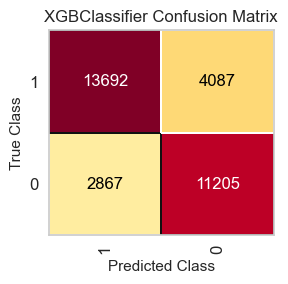

ConfusionMatrix(ax=<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=array([1, 0], dtype=int64),
                cmap=<matplotlib.colors.ListedColormap object at 0x000002460289BB50>,
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None...
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.02, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=10000,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=2311, ...))

In [60]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(3, 3))
confusion_matrix(xgbc, X_train, y_train, X_test, y_test, classes=df['smoking'].unique())

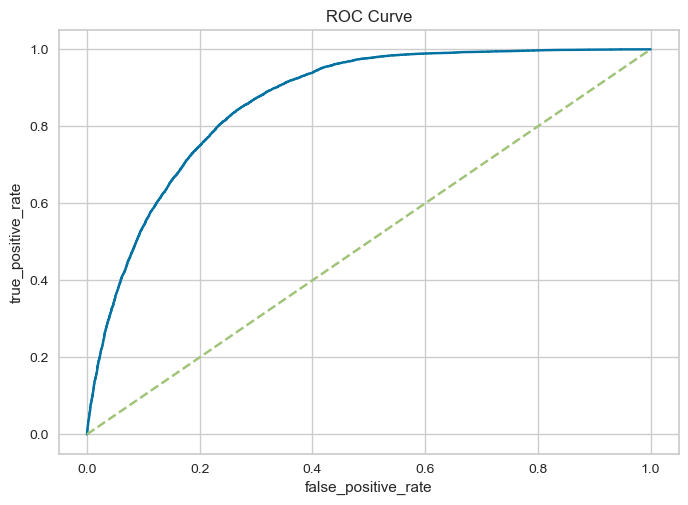

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, xgbc_pred)

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [62]:
roc_auc_score(y_test, xgbc_pred)


0.8645036969441723

In [64]:
!pip install lightgbm

                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB ? eta -:--:--
     -                                        0.0/1.3 MB 487.6 kB/s eta 0:00:03
     -                                        0.0/1.3 MB 487.6 kB/s eta 0:00:03
     ---                                      0.1/1.3 MB 652.2 kB/s eta 0:00:02
     ---                                      0.1/1.3 MB 652.2 kB/s eta 0:00:02
     ---                                      0.1/1.3 MB 479.3 kB/s eta 0:00:03
     ----                                     0.1/1.3 MB 472.1 kB/s eta 0:00:03
     ----                                     0.1/1.3 MB 472.1 kB/s eta 0:00:03
     ----                                     0.1/1.3 MB 472.1 kB/s eta 0:00:03
     ------                                   0.2/1.3 MB 509.6 kB/s eta 0:00:03
     -------                                  0.2/1.3 MB 485.6 kB/s eta 0:00:03
     -------                                  0.2/1.3 MB 4

In [65]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(n_estimators=10000, learning_rate = 0.02, random_state=2311)
lgbmc.fit(X_train, y_train)

lgbmc_pred = lgbmc.predict_proba(X_test)[:, 1]
lgbmc_pred[:20]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55581, number of negative: 71824
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1639
[LightGBM] [Info] Number of data points in the train set: 127405, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436254 -> initscore=-0.256377
[LightGBM] [Info] Start training from score -0.256377


array([2.52737266e-02, 7.28225860e-01, 6.98061035e-01, 5.54715173e-01,
       2.05570936e-04, 2.33528380e-01, 6.73130377e-01, 4.87056592e-01,
       1.00192158e-01, 3.65039604e-01, 8.96190680e-01, 2.26198849e-01,
       5.42059646e-03, 1.48524850e-02, 1.99769310e-02, 6.73345094e-03,
       2.65617622e-01, 5.57126474e-01, 2.58146491e-03, 8.71955078e-01])

In [66]:
lgbmc_pred_label = np.where(lgbmc_pred > 0.5, 1, 0)
lgbmc_pred_label[:20]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [67]:
y_test[:20].array


<PandasArray>
[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Length: 20, dtype: int64

In [68]:
print(classification_report(y_test, lgbmc_pred_label))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80     17779
           1       0.73      0.80      0.76     14072

    accuracy                           0.78     31851
   macro avg       0.78      0.78      0.78     31851
weighted avg       0.79      0.78      0.78     31851



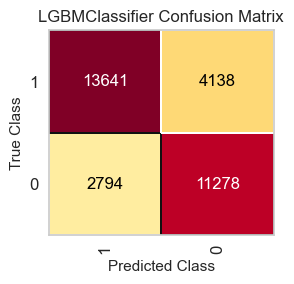

ConfusionMatrix(ax=<Axes: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=array([1, 0], dtype=int64),
                cmap=<matplotlib.colors.ListedColormap object at 0x0000024678591A90>,
                estimator=LGBMClassifier(learning_rate=0.02, n_estimators=10000,
                                         random_state=2311))

In [69]:
plt.figure(figsize=(3, 3))
confusion_matrix(lgbmc, X_train, y_train, X_test, y_test, classes=df['smoking'].unique())

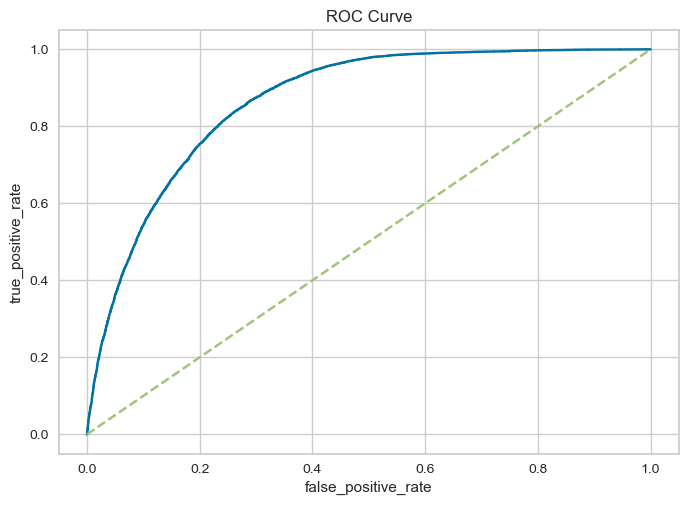

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lgbmc_pred)

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [71]:
roc_auc_score(y_test, lgbmc_pred)


0.8656693452914934

In [76]:
!pip install catboost


                                              0.0/101.0 MB ? eta -:--:--
                                              0.0/101.0 MB ? eta -:--:--
                                              0.0/101.0 MB ? eta -:--:--
                                              0.0/101.0 MB ? eta -:--:--
                                              0.1/101.0 MB 1.7 MB/s eta 0:01:02
                                            0.1/101.0 MB 787.7 kB/s eta 0:02:09
                                            0.1/101.0 MB 787.7 kB/s eta 0:02:09
                                            0.1/101.0 MB 595.3 kB/s eta 0:02:50
                                            0.1/101.0 MB 516.7 kB/s eta 0:03:16
                                            0.1/101.0 MB 516.7 kB/s eta 0:03:16
                                            0.1/101.0 MB 426.7 kB/s eta 0:03:57
                                            0.2/101.0 MB 382.3 kB/s eta 0:04:24
                                            0.2/101.0 MB 382.3 kB/s

In [81]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(n_estimators=10000, learning_rate = 0.02, random_state=2311, verbose=0)
cbc.fit(X_train, y_train)

cbc_pred = cbc.predict_proba(X_test)[:, 1]
cbc_pred[:20]

array([2.67431705e-02, 6.57389094e-01, 6.90754967e-01, 5.39816399e-01,
       4.67446954e-04, 4.51201087e-01, 7.39576052e-01, 6.44459487e-01,
       1.10543227e-01, 3.42349596e-01, 8.66854477e-01, 2.17797078e-01,
       2.14330602e-02, 1.92457423e-02, 2.65993918e-02, 1.19753284e-02,
       2.22174616e-01, 4.97805971e-01, 1.05600757e-02, 7.66832465e-01])

In [82]:
cbc_pred_label = np.where(cbc_pred > 0.5, 1, 0)
cbc_pred_label[:20]

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [83]:
print(classification_report(y_test, cbc_pred_label))


              precision    recall  f1-score   support

           0       0.84      0.77      0.80     17779
           1       0.73      0.81      0.77     14072

    accuracy                           0.79     31851
   macro avg       0.79      0.79      0.79     31851
weighted avg       0.79      0.79      0.79     31851



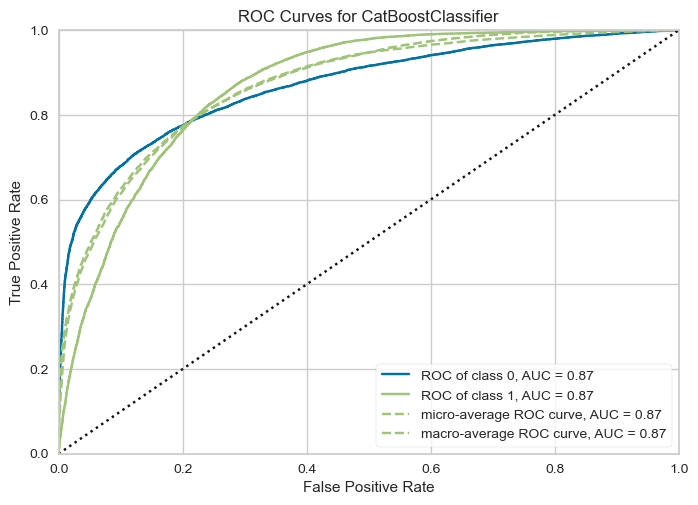

<Axes: title={'center': 'ROC Curves for CatBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [84]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.contrib.wrapper import wrap

model = wrap(cbc)
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [85]:
roc_auc_score(y_test, cbc_pred)


0.8692977964466194

In [86]:
wmb_pred = 0.3*xgbc.predict_proba(X_test)[:,1] + 0.3*lgbmc.predict_proba(X_test)[:,1] + 0.4*cbc.predict_proba(X_test)[:,1]
wmb_pred[:20]

array([2.32196743e-02, 6.91937047e-01, 6.95447704e-01, 5.90152437e-01,
       2.82684089e-04, 3.25895231e-01, 7.06589802e-01, 5.65962136e-01,
       1.04592135e-01, 3.34972664e-01, 8.90600163e-01, 2.30556490e-01,
       1.13455063e-02, 1.43703075e-02, 1.91768317e-02, 9.60061862e-03,
       2.11625360e-01, 5.27716886e-01, 7.28098237e-03, 8.30250154e-01])

In [87]:
wmb_pred_label = np.where(wmb_pred > 0.5, 1, 0)
wmb_pred_label[:20]

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [88]:
print(classification_report(y_test, wmb_pred_label))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80     17779
           1       0.73      0.81      0.77     14072

    accuracy                           0.79     31851
   macro avg       0.78      0.79      0.78     31851
weighted avg       0.79      0.79      0.79     31851



In [89]:
roc_auc_score(y_test, wmb_pred)


0.8691534239106053